# NOTEBOOK FOR COMPETETION(AI FEST 4.0)

# Exploratory Data Analysis

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

In [331]:
# Viewing the top 5 rows of dataset

data=pd.read_csv("pakistanproperty.csv")
data.head()

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year
0,0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla,7,10,2019
1,1,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,6.2,Marla,5,5,2019
2,2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.0,Kanal,10,19,2018
3,3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,Crown Associate,Abrar Ahmed,1.0,Kanal,6,27,2019
4,4,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,Al Sahar Estate,Zahid H. Usmani,7.1,Marla,6,3,2019


In [332]:
# Showing whole info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72156 entries, 0 to 72155
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             72156 non-null  int64  
 1   property_type  72156 non-null  object 
 2   price          72156 non-null  int64  
 3   location       72156 non-null  object 
 4   city           72156 non-null  object 
 5   province_name  72156 non-null  object 
 6   latitude       72156 non-null  float64
 7   longitude      72156 non-null  float64
 8   baths          72156 non-null  int64  
 9   area           72156 non-null  object 
 10  purpose        72156 non-null  object 
 11  bedrooms       72156 non-null  int64  
 12  agence         72156 non-null  object 
 13  agent          72156 non-null  object 
 14  area.1         72156 non-null  float64
 15  area unit      72156 non-null  object 
 16  month          72156 non-null  int64  
 17  day            72156 non-null  int64  
 18  year  

In [333]:
print(data.duplicated().value_counts())
duplicated_data = data[data.duplicated()]
duplicated_data.sort_values(by='price')

False    72156
dtype: int64


,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year


### Distribution of price column and Removing Outliers from it

<AxesSubplot: >

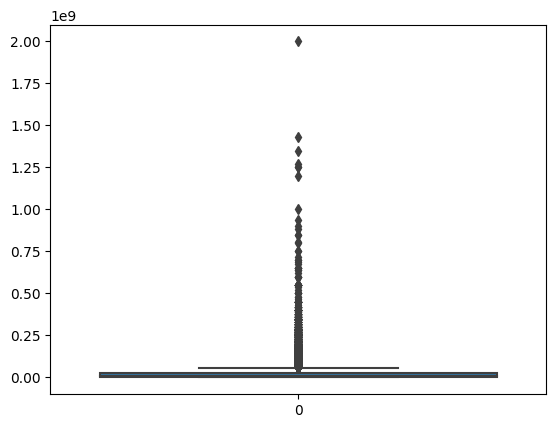

In [334]:
sns.boxplot(data['price'])

In [335]:
# Descrbing the mean,standarad deviation,mininum, maximum values
# It also describe the 25 percentie, 50 percentile and 75 percentile
data['price'].describe()

count    7.215600e+04
mean     2.208442e+07
std      4.256980e+07
min      0.000000e+00
25%      6.287500e+05
50%      1.050000e+07
75%      2.400000e+07
max      2.000000e+09
Name: price, dtype: float64

In [336]:
data.sort_values('price').head(10)

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year
53297,53297,Farm House,0,Gadap Road,Karachi,Sindh,25.053956,67.253365,0,8 Kanal,For Sale,0,Bin Anus Real Estate,M. Humayun Jokhio,8.0,Kanal,6,21,2019
38357,38357,House,1,DHA Defence,Karachi,Sindh,24.786735,67.083292,6,1 Kanal,For Sale,5,Bukhari Properties,Bukhari Properties,1.0,Kanal,6,6,2019
6558,6558,House,5,DHA Defence,Karachi,Sindh,24.805044,67.064323,4,12 Marla,For Sale,4,Bukhari Properties,Bukhari Properties,12.0,Marla,7,4,2019
7734,7734,House,6,DHA Defence,Karachi,Sindh,24.786735,67.083292,4,6 Marla,For Sale,4,Bukhari Properties,Bukhari Properties,6.0,Marla,7,4,2019
7870,7870,House,8,DHA Defence,Karachi,Sindh,24.811562,67.043072,5,1 Kanal,For Sale,5,Bukhari Properties,Bukhari Properties,1.0,Kanal,7,4,2019
30305,30305,Lower Portion,44,Cantt,Lahore,Punjab,31.550817,74.396408,3,16 Marla,For Sale,3,National Estate & Builders,M. Tahir Khan,16.0,Marla,6,17,2019
12247,12247,Room,4000,PWD Colony,Rawalpindi,Punjab,33.570881,73.145235,0,1 Marla,For Rent,0,Al Mubeen Estate,Malik Mubeen,1.0,Marla,2,17,2019
10983,10983,Flat,5000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.573152,73.110881,0,5.8 Marla,For Rent,1,SahulatKar Properties,noman,5.8,Marla,4,6,2019
64967,64967,Room,5000,Girja Road,Rawalpindi,Punjab,33.564923,72.993558,0,1.1 Marla,For Rent,1,Ghazi Property Advisor,Malak Iftikhar Hussain,1.1,Marla,6,28,2019
53168,53168,Upper Portion,5000,Satiana Road,Faisalabad,Punjab,31.378610,73.129245,0,2.5 Marla,For Rent,0,Al Noor Estate Agency,Waqar,2.5,Marla,6,18,2019


In [337]:
data.drop(data[data['price']<50].index,inplace=True)
data.sort_values(by='price').head(10)

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year
12247,12247,Room,4000,PWD Colony,Rawalpindi,Punjab,33.570881,73.145235,0,1 Marla,For Rent,0,Al Mubeen Estate,Malik Mubeen,1.0,Marla,2,17,2019
27890,27890,Flat,5000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.555594,73.133669,2,4 Marla,For Rent,2,SahulatKar Properties,noman,4.0,Marla,5,6,2019
53168,53168,Upper Portion,5000,Satiana Road,Faisalabad,Punjab,31.378610,73.129245,0,2.5 Marla,For Rent,0,Al Noor Estate Agency,Waqar,2.5,Marla,6,18,2019
68135,68135,Upper Portion,5000,Others,Faisalabad,Punjab,31.418700,73.079100,0,2.5 Marla,For Rent,0,Al Noor Estate Agency,Waqar,2.5,Marla,6,25,2019
1481,1481,Flat,5000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.549693,73.130536,1,2.7 Marla,For Rent,1,Khawaja Corporation,Khawaja Shoaib,2.7,Marla,7,13,2019
64966,64966,Room,5000,Girja Road,Rawalpindi,Punjab,33.564923,72.993558,0,1.1 Marla,For Rent,1,Ghazi Property Advisor,Malak Iftikhar Hussain,1.1,Marla,6,28,2019
64967,64967,Room,5000,Girja Road,Rawalpindi,Punjab,33.564923,72.993558,0,1.1 Marla,For Rent,1,Ghazi Property Advisor,Malak Iftikhar Hussain,1.1,Marla,6,28,2019
10986,10986,Flat,5000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.566646,73.116842,1,4.9 Marla,For Rent,1,SahulatKar Properties,Syed Umar Mukhtar,4.9,Marla,4,6,2019
59131,59131,Room,5000,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,3,8 Marla,For Rent,1,Al Mubeen Estate,Malik Mubeen,8.0,Marla,6,27,2019
10983,10983,Flat,5000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.573152,73.110881,0,5.8 Marla,For Rent,1,SahulatKar Properties,noman,5.8,Marla,4,6,2019


### distribution of price with respect to cities

In [338]:
city=list(data['city'].unique())
city

['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi']

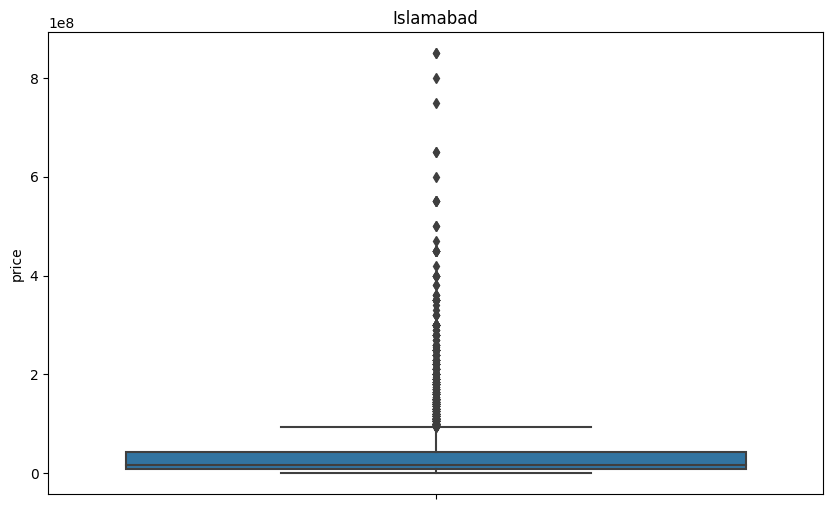

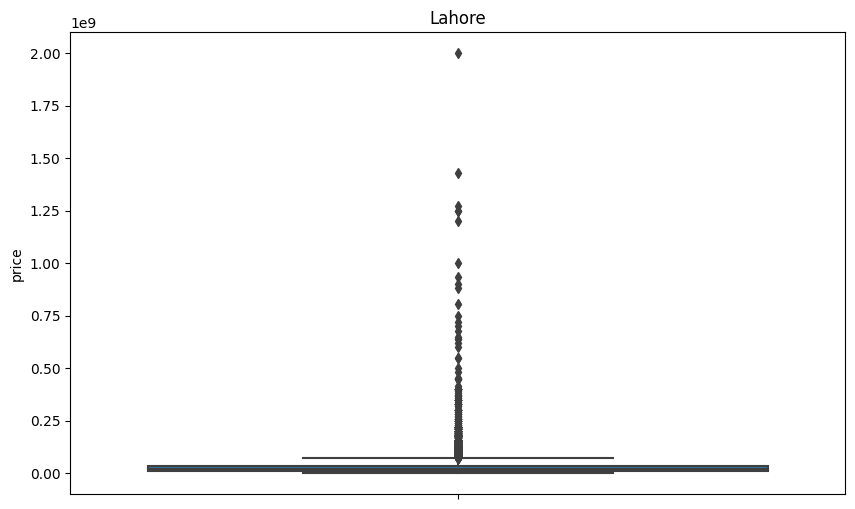

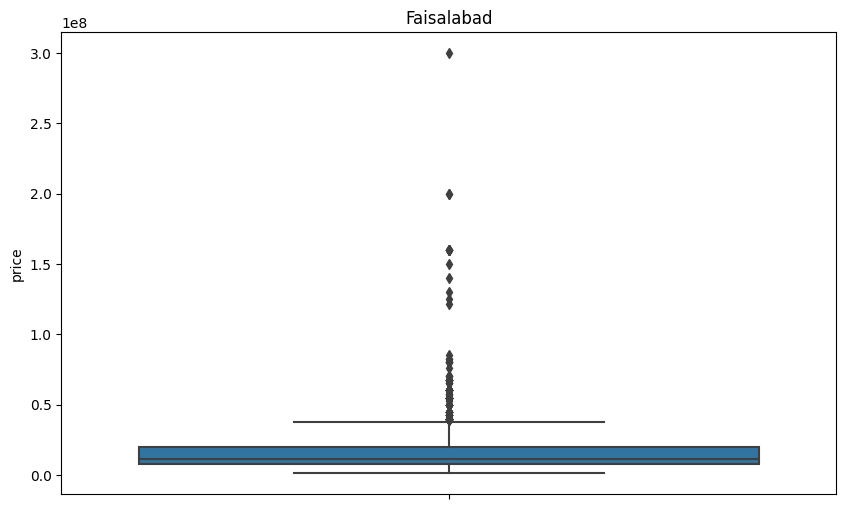

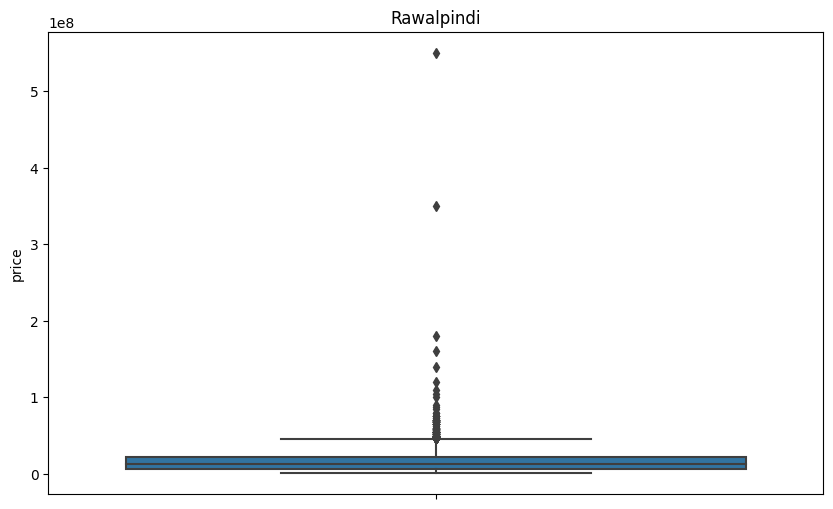

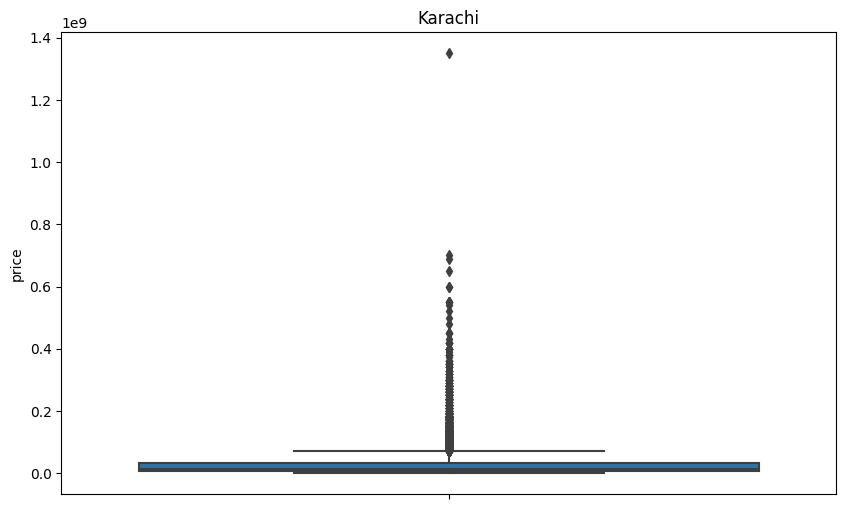

In [339]:
sale=data[data['purpose']=='For Sale']
for i in city:
  plt.figure(figsize=(10,6))
  check=sale[data['city']==i]
  sns.boxplot(y='price',data=check);
  plt.title(i)
  plt.show()

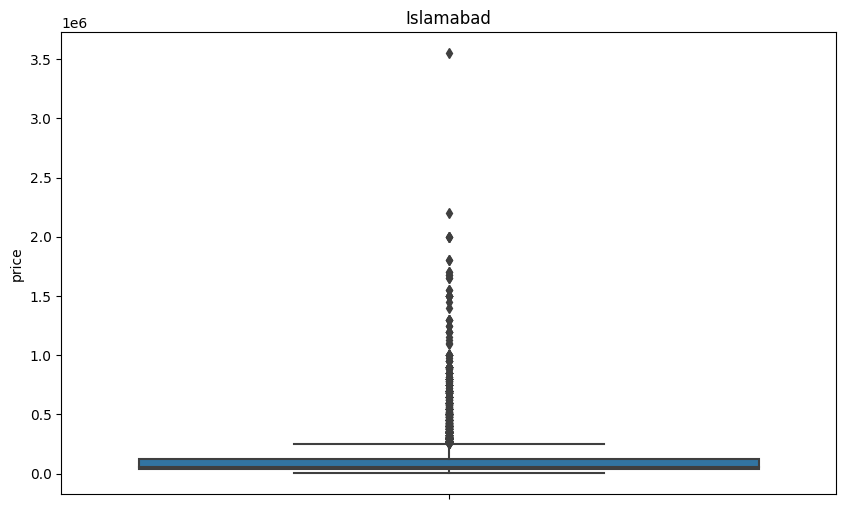

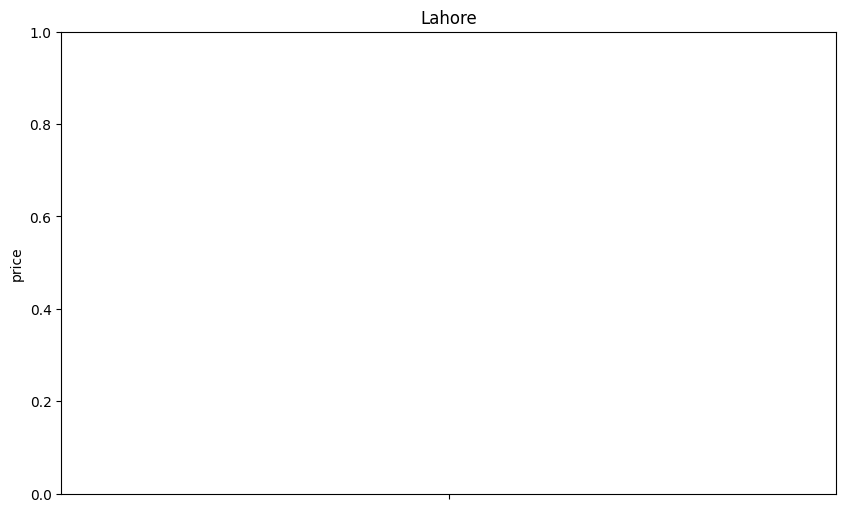

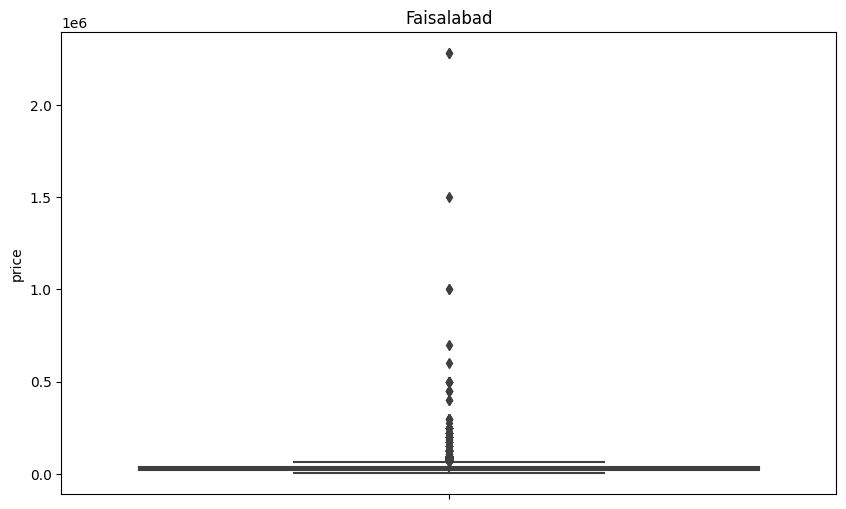

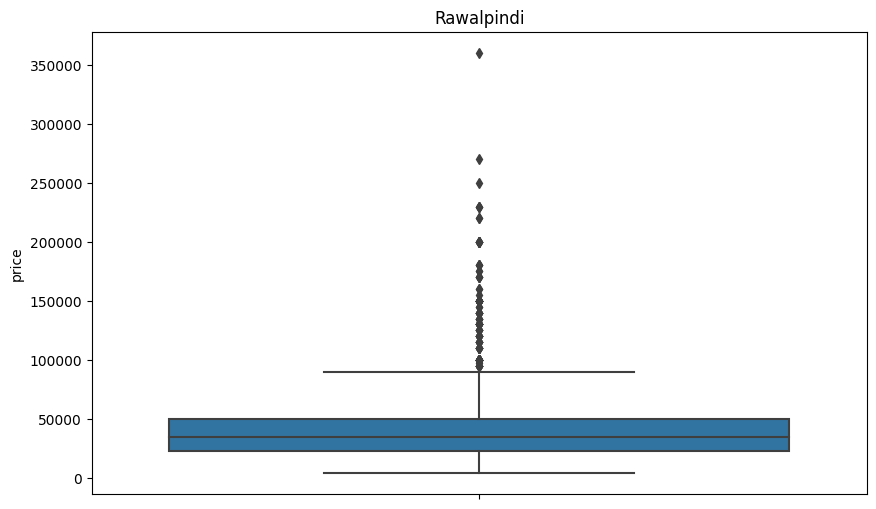

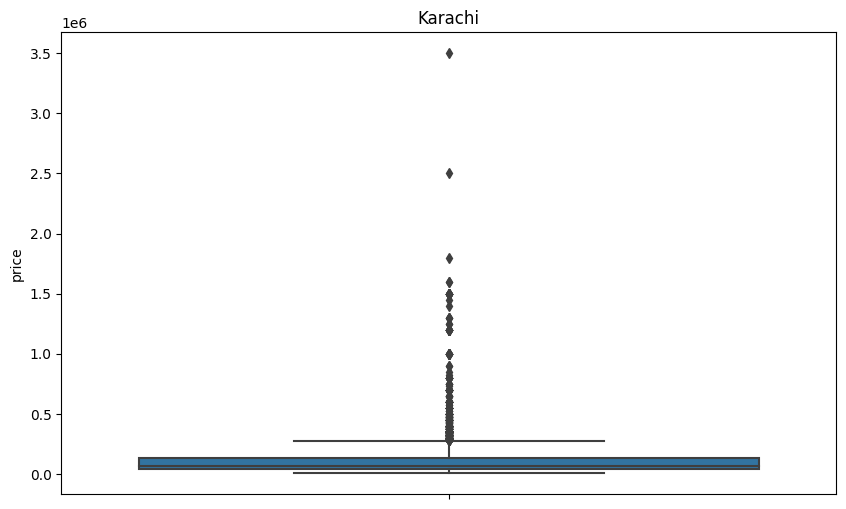

In [340]:
rent=data[data['purpose']!='For Sale']
for i in city:
  plt.figure(figsize=(10,6))
  check=rent[data['city']==i]
  sns.boxplot(y='price',data=check);
  plt.title(i)
  plt.show()

In [341]:
# Removing Outliers

# It should be noted that we have not removed all the Outliers because it is a real world problem and the model can be overfitted

data=data[((data['city']=='Islamabad') & (data['price']<250000000) & (data['purpose'] == 'For Sale')) | ((data['city']=='Rawalpindi') & (data['price']<100000000) & (data['purpose'] == 'For Sale')) | ((data['city']=="Karachi") & (data['price']<250000000) & (data['purpose'] == 'For Sale')) | ((data['city']=="Faisalabad") & (data['price']<100000000) & (data['purpose'] == 'For Sale'))| ((data['city']=='Lahore') & (data['price']<500000000) & (data['purpose'] == 'For Sale')) | ((data['city']=='Islamabad') & (data['price']<500000) & (data['purpose'] == 'For Rent'))| ((data['city']=='Rawalpindi') & (data['price']<200000) & (data['purpose'] == 'For Rent'))| ((data['city']=="Karachi") & (data['price']<500000) & (data['purpose'] == 'For Rent')) | ((data['city']=="Faisalabad") & (data['price']<200000) & (data['purpose'] == 'For Rent'))]
data.shape


(71104, 19)

In [342]:
print(data.duplicated().value_counts())
duplicated_data = data[data.duplicated()]
duplicated_data.sort_values(by='price')

False    71104
dtype: int64


,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year


In [343]:
data

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year
0,0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla,7,10,2019
1,1,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,6.2,Marla,5,5,2019
2,2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.0,Kanal,10,19,2018
3,3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,Crown Associate,Abrar Ahmed,1.0,Kanal,6,27,2019
4,4,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,Al Sahar Estate,Zahid H. Usmani,7.1,Marla,6,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72151,72151,Flat,25000000,Jamshed Town,Karachi,Sindh,24.861596,67.054710,4,8.4 Marla,For Sale,4,Karsaz Estate,Muhammad Shahrukh,8.4,Marla,6,30,2019
72152,72152,House,30000,Bahria Town Karachi,Karachi,Sindh,25.058062,67.306626,0,8 Marla,For Rent,3,ZPN Real Estate & Builders,Ali Raza,8.0,Marla,6,27,2019
72153,72153,Lower Portion,10000,Malir,Karachi,Sindh,24.902505,67.201823,2,2.4 Marla,For Rent,2,Aarfi Estate Agency,Anwar Shah,2.4,Marla,7,3,2019
72154,72154,Upper Portion,12000,Malir,Karachi,Sindh,24.884568,67.183878,2,3.2 Marla,For Rent,2,Aarfi Estate Agency,Anwar Shah,3.2,Marla,7,3,2019


## Distribution of Categorical Variables

In [344]:
# displaying number of unique values in each column attributes of a dataset
data.nunique()

ID               71104
property_type        7
price             1368
location           975
city                 5
province_name        3
latitude          3539
longitude         3706
baths               14
area               280
purpose              2
bedrooms            17
agence            5185
agent             8857
area.1             211
area unit            2
month               12
day                 29
year                 2
dtype: int64

In [345]:
# Making a list of Categorical Variables in a dataset
cat_attributes=['property_type','city','province_name','baths','purpose','bedrooms','month','year']

In [346]:
# Displaying different values of each categorical variable and their value count
for i  in cat_attributes:
    print(i,'\n')
    print(data[i].value_counts())
    print('\n')


property_type 

House            44669
Flat             17583
Upper Portion     4929
Lower Portion     3259
Farm House         323
Penthouse          181
Room               160
Name: property_type, dtype: int64


city 

Karachi       26300
Lahore        18201
Islamabad     15507
Rawalpindi     7501
Faisalabad     3595
Name: city, dtype: int64


province_name 

Punjab               29297
Sindh                26300
Islamabad Capital    15507
Name: province_name, dtype: int64


baths 

0     16659
3     14849
2      9662
4      8703
6      8023
5      7239
7      2429
1      2001
8      1003
10      274
9       257
11        2
12        2
13        1
Name: baths, dtype: int64


purpose 

For Sale    53453
For Rent    17651
Name: purpose, dtype: int64


bedrooms 

3     19899
2     12271
5     10972
4     10073
0      8309
6      5377
1      1878
7      1259
8       507
9       264
10      170
11      106
12       10
16        3
13        3
14        2
15        1
Name: bedrooms, dtype: in

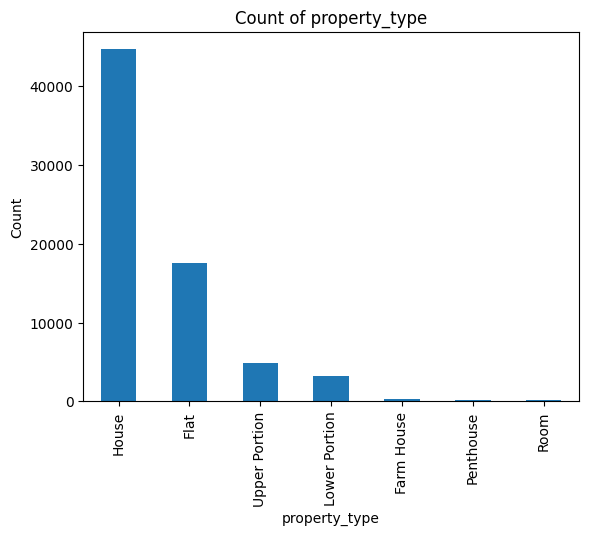

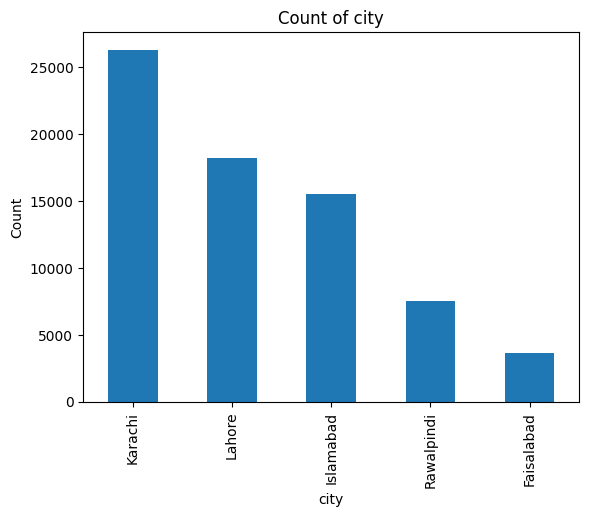

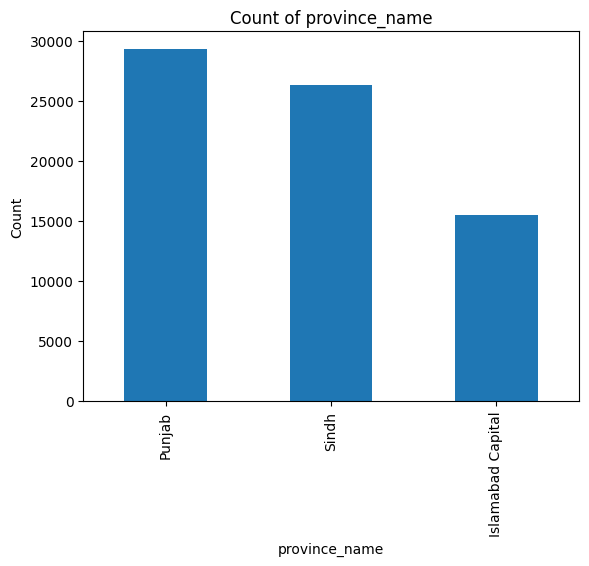

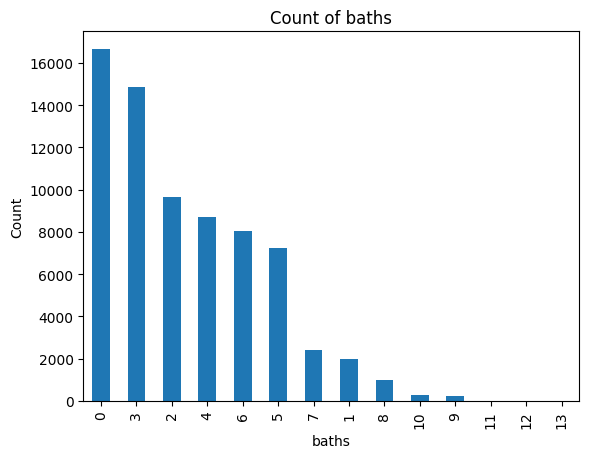

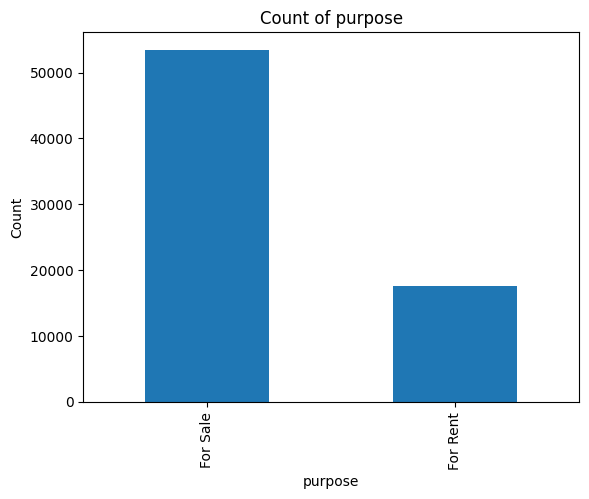

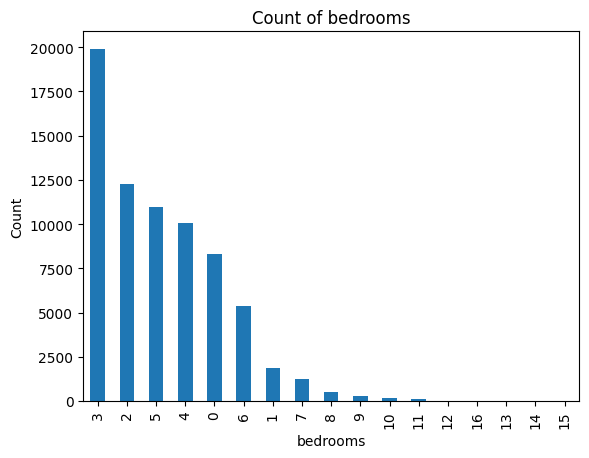

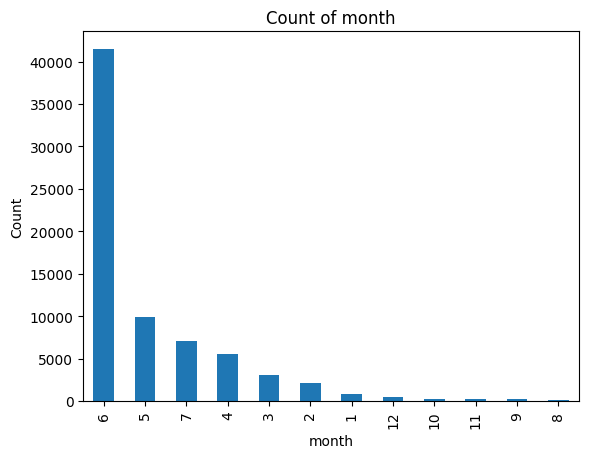

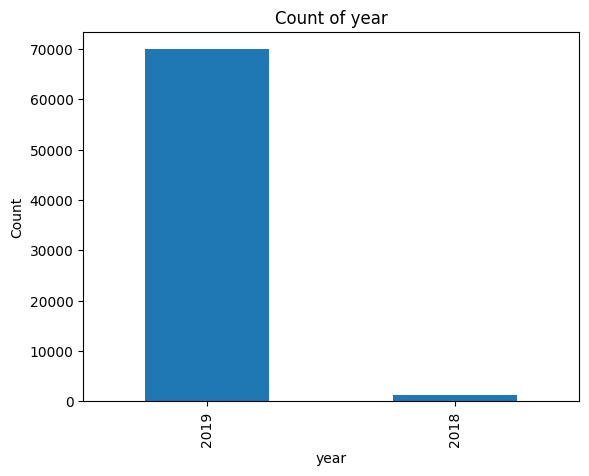

In [347]:

# Creating a Bar Plot for each categorical varible as done above
# Plotting the Bar plot for each gives as a good insight

for i  in cat_attributes:
    # Plotting the count of each column
    data[i].value_counts().plot.bar()
    # Adding a title to the plot
    plt.title(f"Count of {i}")
    # Adding labels to the x and y axes
    plt.xlabel(i)
    plt.ylabel("Count")
    # Displaying the plot
    plt.show()

### Finding The Affect on prices due to Categorical columns

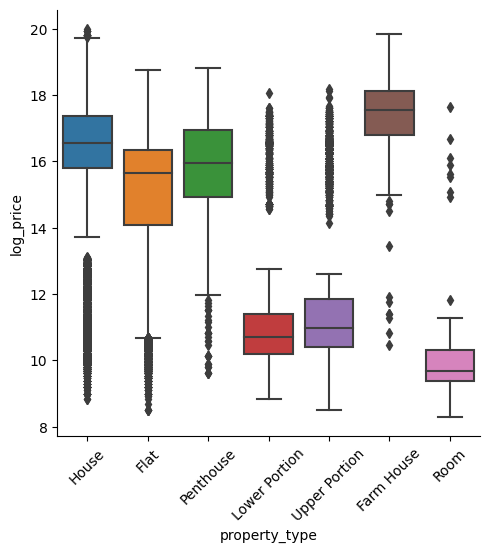

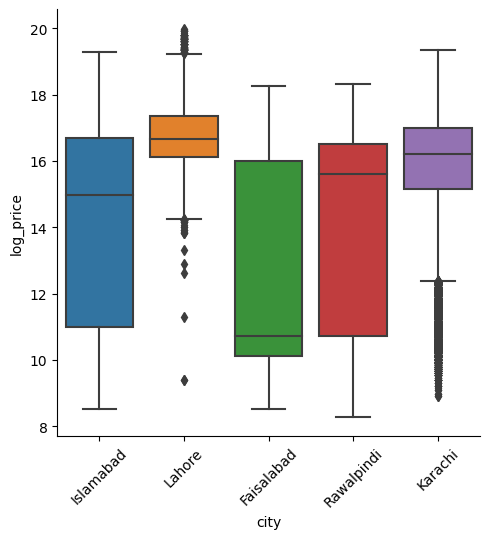

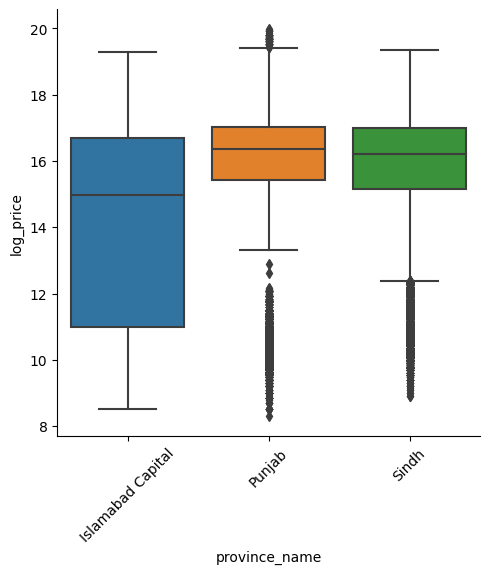

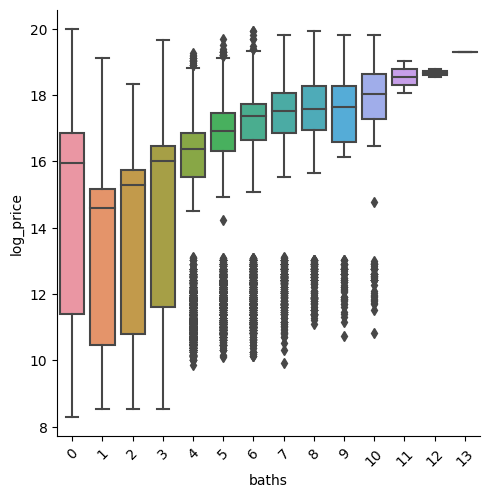

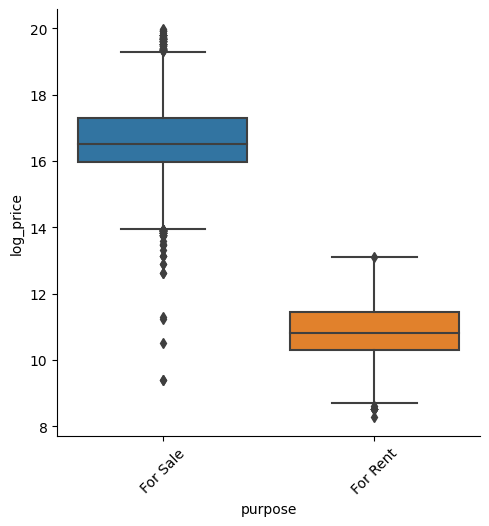

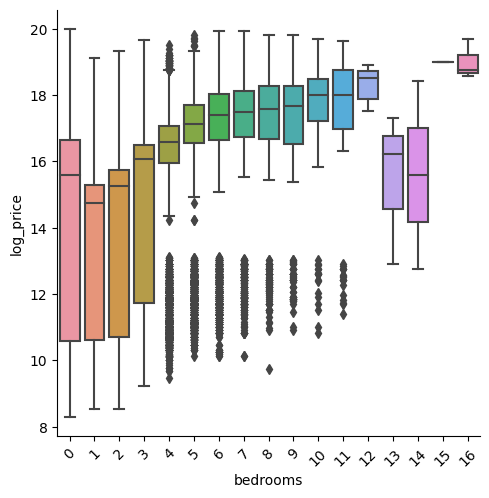

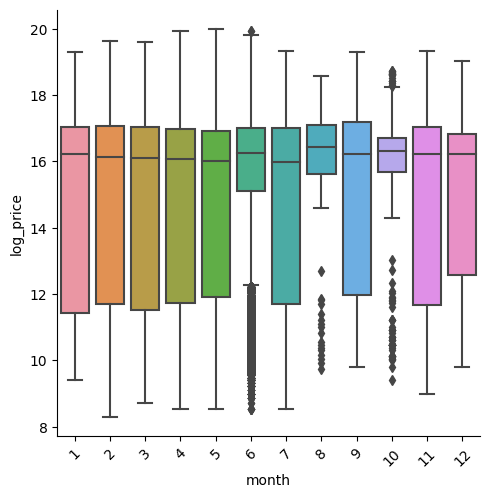

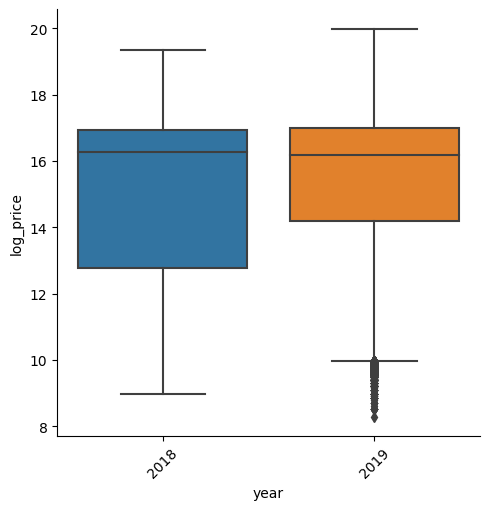

In [348]:
# Creating a Box plot with respect to target variabe(Price)
# It will help us to visualize outliers and inter quantile percentile (IQR)

# We have taken the log of Price Column to scale it in a smaller scale as the values are pretty huge

data['log_price']=data['price'].apply(lambda x : np.log(x))

for i in cat_attributes:
    plot = sns.catplot(x=i, y='log_price', kind='box', data=data)
    plot.set_xticklabels(rotation=45)



The above box plots show that except **year and months** all the other categorical attributes show a high relation with variance of the price

In [349]:
# Showing the missing values in all Columns
data.isnull().sum()

ID               0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
agence           0
agent            0
area.1           0
area unit        0
month            0
day              0
year             0
log_price        0
dtype: int64

<AxesSubplot: xlabel='log_price', ylabel='Count'>

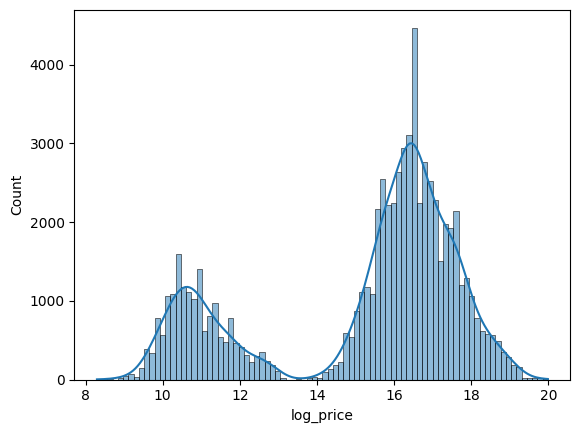

In [350]:
# Creating histogram for Price column to get the insight on the distribution of values

sns.histplot(data['log_price'],kde=True)


### Simplifying the Location Variable

In [351]:
# Grouping the values by Location and their IDs with their respective value counts
a=data.groupby('location').agg({'ID':'count'}).reset_index().sort_values('ID',ascending=False)#[data['property_type']>50]
a.head(70)

,location,ID
224,DHA Defence,11519
128,Bahria Town Rawalpindi,4019
127,Bahria Town Karachi,3519
374,Gulistan-e-Jauhar,2614
391,Gulshan-e-Iqbal Town,1969
...,...,...
182,Chaklala Scheme,182
276,Eden,169
217,D-12,165
316,Frere Town,162


The "location" column is categorical and can be important for model training. However, it has nearly 1000 unique values. To reduce the number of categories, we will only keep the 70 most frequent values and group all the remaining values together.

In [352]:
other_locations=list(a[a['ID']<162]['location'])
len(other_locations)

906

In [353]:
def others(x):
  if x in other_locations:
    return 'others'
  else :
    return x
data['location']=data['location'].apply(lambda x: others(x))

In [354]:
data['location'].value_counts()

others                    15188
DHA Defence               11519
Bahria Town Rawalpindi     4019
Bahria Town Karachi        3519
Gulistan-e-Jauhar          2614
                          ...  
Four Season Housing         190
Chaklala Scheme             182
Eden                        169
D-12                        165
Frere Town                  162
Name: location, Length: 70, dtype: int64

In [355]:
data.drop('ID',axis=1,inplace=True)

In [356]:
city=list(data.city.unique())
city

['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi']

### Distribution of the price with respect to the location columns

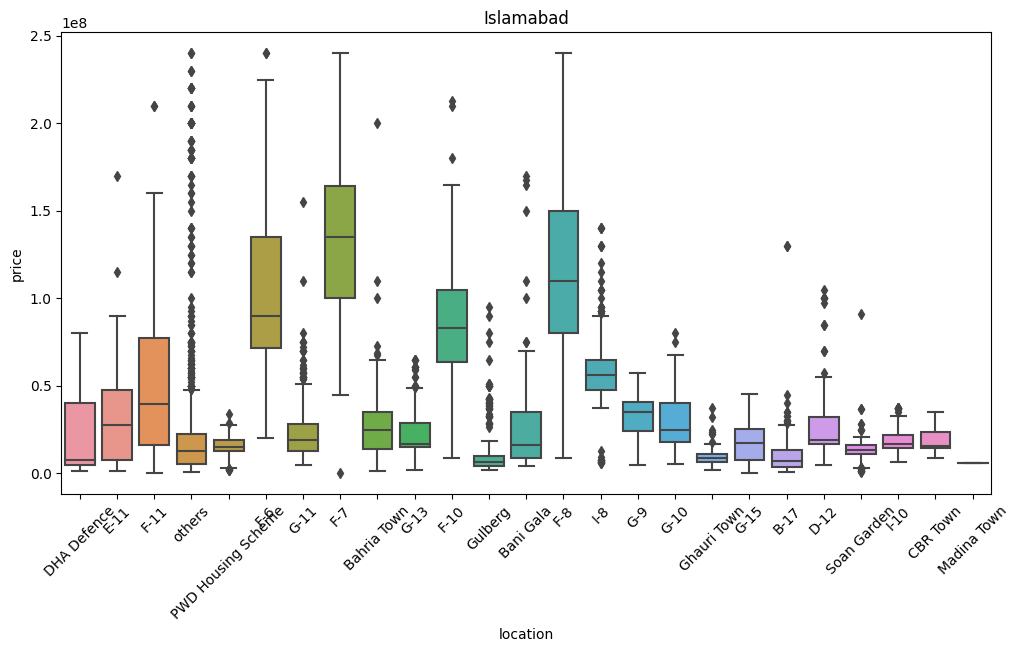

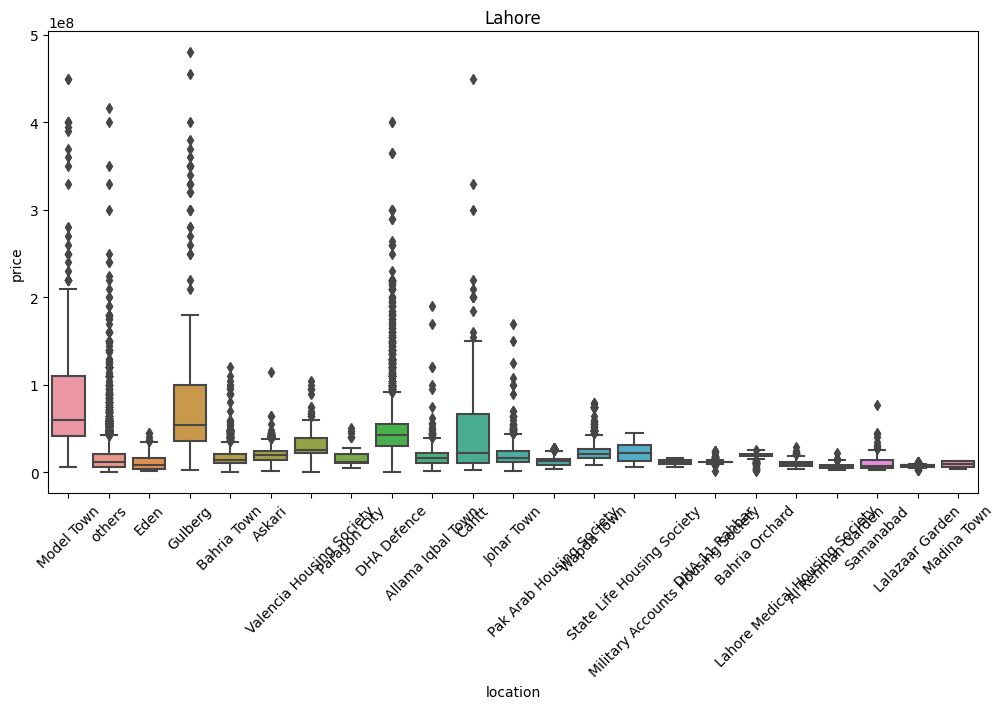

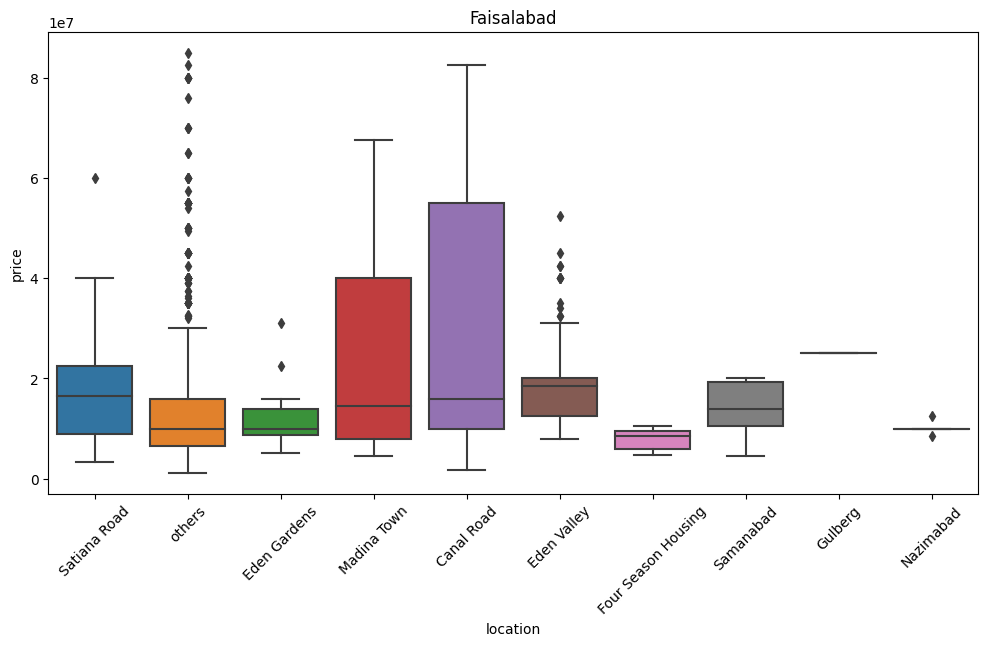

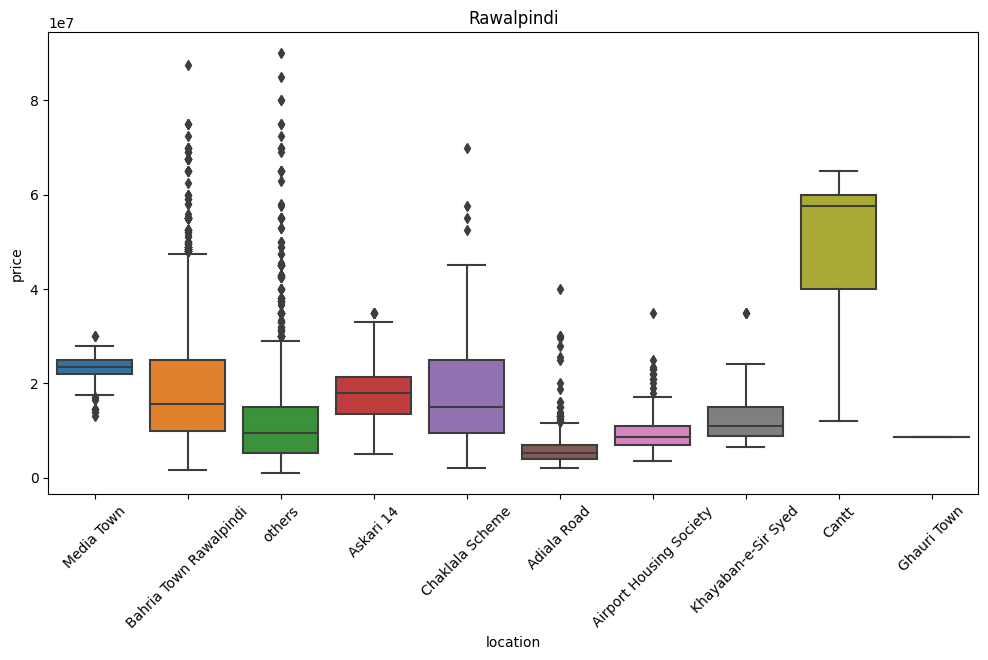

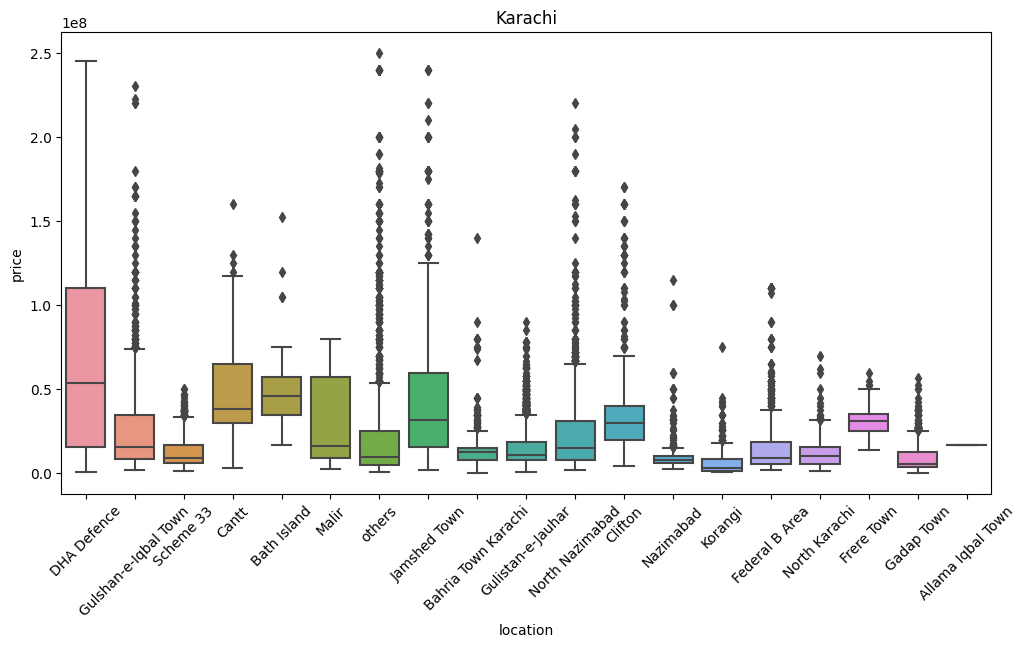

In [357]:
for i in city:
    plt.figure(figsize=(12, 6))
    check = data[(data['city'] == i) & (data['purpose'] == 'For Sale')]
    sns.boxplot(x='location', y='price', data=check)
    plt.xticks(rotation=45)
    plt.title(i)
    plt.show()

For rent

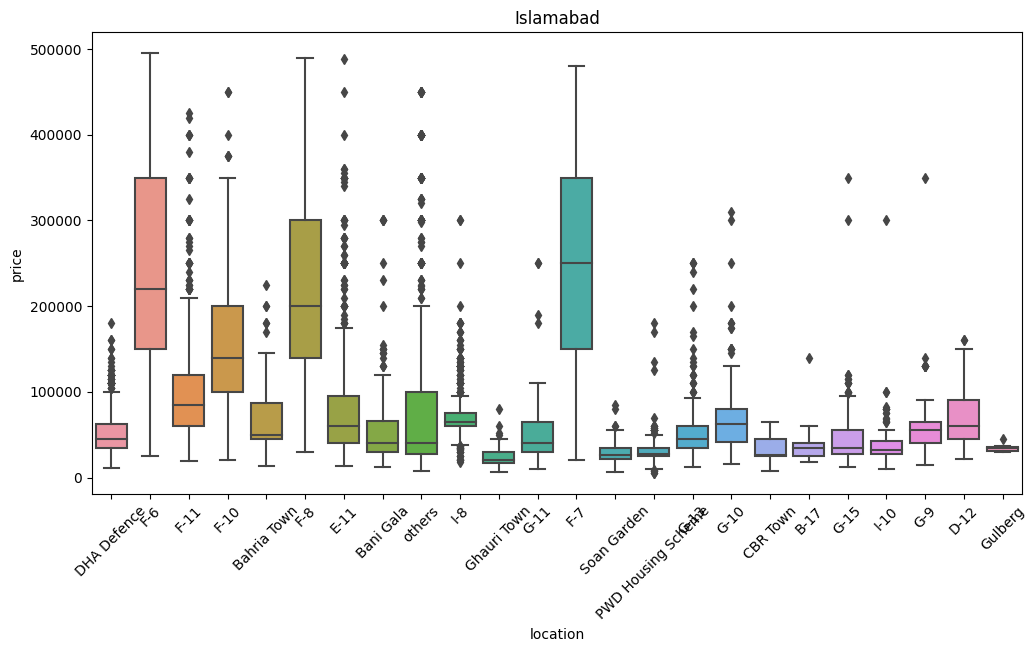

<Figure size 1200x600 with 0 Axes>

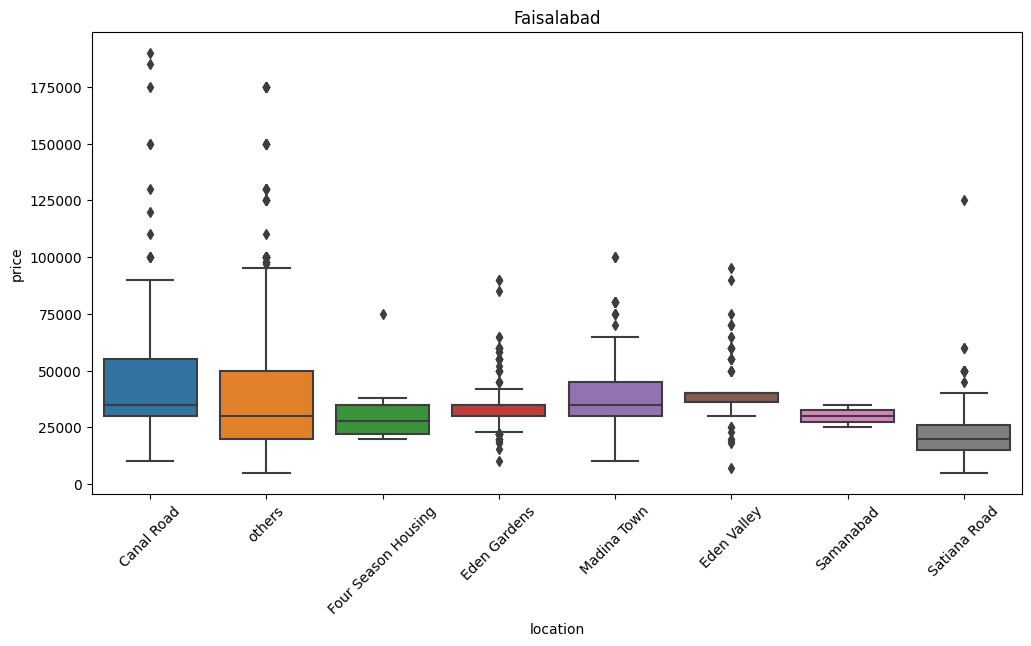

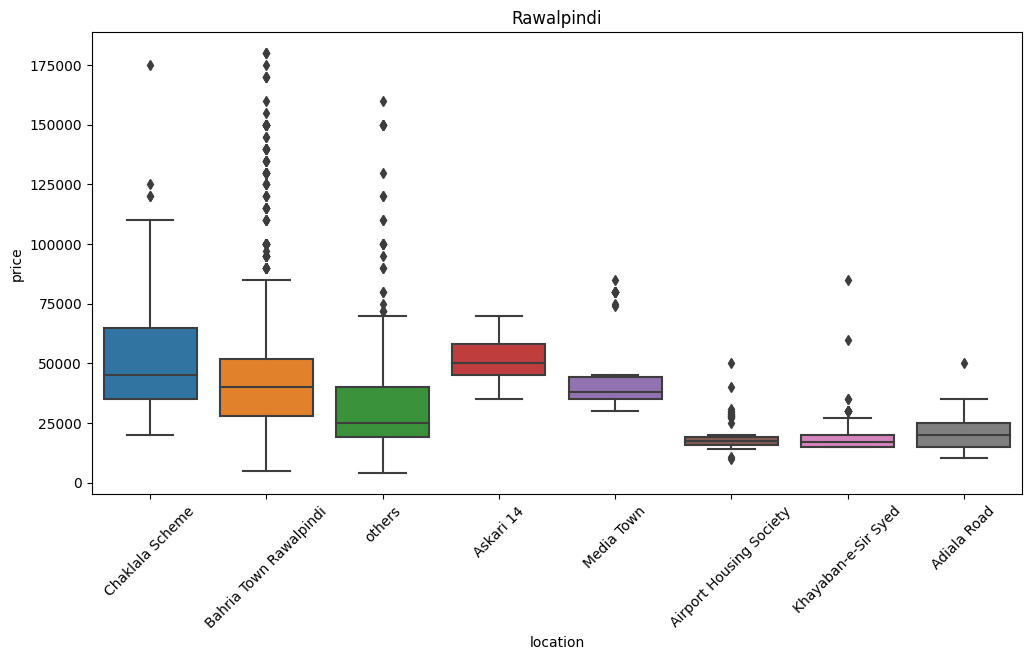

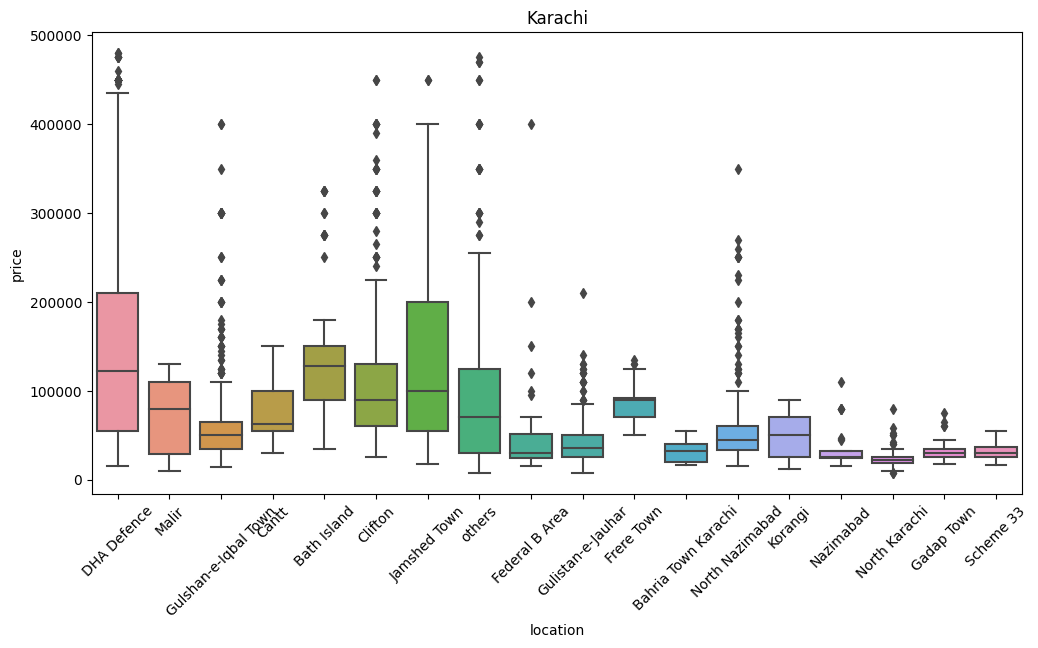

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in city:
    plt.figure(figsize=(12, 6))
    check = data[(data['city'] == i) & (data['purpose'] == 'For Rent')]
    
    if not check.empty:
        sns.boxplot(x='location', y='price', data=check)
        plt.xticks(rotation=45)
        plt.title(i)
        plt.show()

The varience in above plots shows that the **location** has a high correlation with the **price**

In [359]:
data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year,log_price
0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla,7,10,2019,15.761421
1,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,6.2,Marla,5,5,2019,15.869634
2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.0,Kanal,10,19,2018,17.727534
3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,Crown Associate,Abrar Ahmed,1.0,Kanal,6,27,2019,17.504390
4,Flat,35000000,others,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,Al Sahar Estate,Zahid H. Usmani,7.1,Marla,6,3,2019,17.370859


In [360]:
# Drop the unnecessary columns from the dataframe
data.drop(['agent', 'agence', 'month', 'year'], axis=1, inplace=True)
data.drop(['day'],axis=1,inplace=True)

In [361]:
data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,area.1,area unit,log_price
0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,8.0,Marla,15.761421
1,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,6.2,Marla,15.869634
2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,1.0,Kanal,17.727534
3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,1.0,Kanal,17.504390
4,Flat,35000000,others,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,7.1,Marla,17.370859


## Converting _**Area**_ to a single unit

In [362]:
def converting_unit(x):
    if 'area unit' in x and x['area unit'] == 'Kanal':
        return x['area.1'] * 20,'Marla'
    else:
        return x['area.1'],x['area unit']

data[['area.1','area unit']] = data.apply(lambda x: pd.Series(converting_unit(x)), axis=1)

In [363]:
data.sample(50)

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,area.1,area unit,log_price
1888,House,35000000,DHA Defence,Karachi,Sindh,24.782215,67.074537,5,4.8 Marla,For Sale,5,4.8,Marla,17.370859
48094,House,6000000,others,Lahore,Punjab,31.520898,74.423790,3,5 Marla,For Sale,3,5.0,Marla,15.607270
16670,House,32500000,Gulistan-e-Jauhar,Karachi,Sindh,24.912026,67.130733,6,9.6 Marla,For Sale,6,9.6,Marla,17.296751
40221,House,17500000,others,Lahore,Punjab,31.443383,74.286324,0,10 Marla,For Sale,4,10.0,Marla,16.677711
2315,House,60000000,DHA Defence,Karachi,Sindh,24.805044,67.064320,4,12 Marla,For Sale,4,12.0,Marla,17.909855
34467,House,9000000,others,Faisalabad,Punjab,31.431858,73.054833,0,3.5 Marla,For Sale,0,3.5,Marla,16.012735
45655,House,69000,others,Faisalabad,Punjab,31.532920,73.065687,0,5 Marla,For Rent,0,5.0,Marla,11.141862
57780,Upper Portion,30000000,Jamshed Town,Karachi,Sindh,24.871447,67.058573,3,8 Marla,For Sale,3,8.0,Marla,17.216708
26203,Flat,6200000,Bahria Town Karachi,Karachi,Sindh,25.020961,67.321172,2,4.2 Marla,For Sale,2,4.2,Marla,15.640060
53618,Upper Portion,35000,G-10,Islamabad,Islamabad Capital,33.678711,73.021395,1,5 Marla,For Rent,2,5.0,Marla,10.463103


## Finding the correlation of Price with numerical attributes


In [364]:
num_attributes = data.select_dtypes(exclude='object').copy()
num_attributes.drop('log_price',inplace=True,axis=1)
num_attributes.head()

,price,latitude,longitude,baths,bedrooms,area.1
0,7000000,33.492591,73.301339,3,3,8.0
1,7800000,33.698244,72.984238,2,2,6.2
2,50000000,33.540894,73.095732,7,7,20.0
3,40000000,33.679211,72.988787,5,5,20.0
4,35000000,33.728873,73.119628,3,3,7.1


<AxesSubplot: >

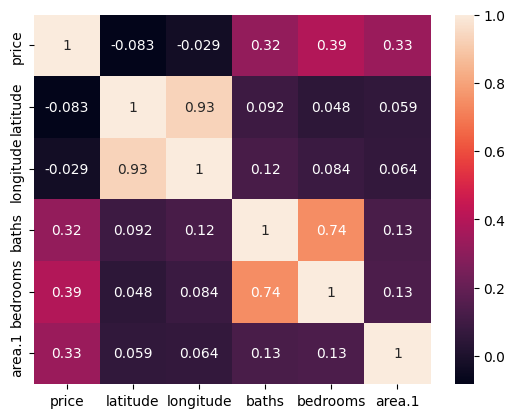

In [365]:
sns.heatmap(num_attributes.corr(), annot=True)

since the city and location is give so we dont need to use longitude and latitude explicity in the model training as it could be result of causation in the model

In [366]:
data.drop(['latitude','longitude'],axis=1,inplace=True)


In [367]:
data.sample(10)

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,area.1,area unit,log_price
71048,House,8000000,Airport Housing Society,Rawalpindi,Punjab,4,5 Marla,For Sale,4,5.0,Marla,15.894952
16814,Flat,3200000,others,Karachi,Sindh,2,3.1 Marla,For Sale,2,3.1,Marla,14.978661
61995,Flat,5900000,others,Karachi,Sindh,0,4.2 Marla,For Sale,3,4.2,Marla,15.590463
692,House,14000000,Bahria Town Rawalpindi,Rawalpindi,Punjab,6,7 Marla,For Sale,5,7.0,Marla,16.454568
53976,Flat,7000000,DHA Defence,Karachi,Sindh,2,2 Marla,For Sale,1,2.0,Marla,15.761421
10180,House,47500000,DHA Defence,Lahore,Punjab,6,1 Kanal,For Sale,5,20.0,Marla,17.676240
12751,House,105000,Malir,Karachi,Sindh,5,1 Kanal,For Rent,5,20.0,Marla,11.561716
16906,House,275000,DHA Defence,Karachi,Sindh,6,1 Kanal,For Rent,6,20.0,Marla,12.524526
61228,House,72500000,Malir,Karachi,Sindh,5,1 Kanal,For Sale,5,20.0,Marla,18.099097
20852,House,50000000,Scheme 33,Karachi,Sindh,4,16 Marla,For Sale,6,16.0,Marla,17.727534


In [368]:
data.drop('area',axis=1,inplace=True)

In [369]:
data.drop('area unit',axis=1,inplace=True)

In [370]:
data.rename(columns={'area.1':'area(Marla)'}, inplace=True)

In [371]:
data.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,area(Marla),log_price
0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,8.0,15.761421
1,Flat,7800000,E-11,Islamabad,Islamabad Capital,2,For Sale,2,6.2,15.869634
2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,7,For Sale,7,20.0,17.727534
3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,5,For Sale,5,20.0,17.504390
4,Flat,35000000,others,Islamabad,Islamabad Capital,3,For Sale,3,7.1,17.370859


**here the EDA is done now we can use the data for model training **

# MODEL TRAINING AND EVALUATION

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor


## Splitting the Data into test and train 

In [373]:
# Assigning features and Target variabels 

x=data.drop(['log_price','price'], axis=1)
y=data['log_price']

In [408]:
# Spliting data into Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

# Getting shape training Test Split with respect to Features(X) and Target(Y) Columns
print("Total Size of Data")
print(data.shape)
print("\nTotal Size of Training Data of Features ")
print(x_train.shape)
print("\nTotal Size of Test Data Features ")
print(x_test.shape),
print("\nTotal Size of Training Data of Target ")
print(y_train.shape)
print("\nTotal Size of Test Data of Target")
print(y_test.shape)

Total Size of Data
(71104, 10)

Total Size of Training Data of Features 
(49772, 8)

Total Size of Test Data Features 
(21332, 8)

Total Size of Training Data of Target 
(49772,)

Total Size of Test Data of Target
(21332,)


In [375]:
data.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,area(Marla),log_price
0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,8.0,15.761421
1,Flat,7800000,E-11,Islamabad,Islamabad Capital,2,For Sale,2,6.2,15.869634
2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,7,For Sale,7,20.0,17.727534
3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,5,For Sale,5,20.0,17.504390
4,Flat,35000000,others,Islamabad,Islamabad Capital,3,For Sale,3,7.1,17.370859


## Creating Pipeline ,Evalution of model and Tuning the model

In [376]:
# Transforming categorical columns By "ColumnTransformer" using "OneHotEncoder" approach 

transformer = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(sparse=False, drop='first'), ['city','province_name','property_type','purpose','location'])],
remainder="passthrough")

In [377]:
transformer 


ColumnTransformer(remainder='passthrough',
                  transformers=[('enc',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['city', 'province_name', 'property_type',
                                  'purpose', 'location'])])

After experimenting with various Machine Learning algorithms, we have determined that the Random Forest algorithm performs the best. Now, we will proceed to optimize and fine-tune the model.

In [491]:
# Creating Pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
pipeline=Pipeline([
    ('preprocessing',transformer),
    ("Random_Forest", RandomForestRegressor() )
]) 


In [492]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city', 'province_name',
                                                   'property_type', 'purpose',
                                                   'location'])])),
                ('Random_Forest', RandomForestRegressor())])

In [497]:
# Setting a grid search for hypertunning 

rs_grid= { 'Random_Forest__n_estimators' : [10,20,50,100],
          'Random_Forest__max_features'  : ['sqrt', None],
          'Random_Forest__max_leaf_nodes' : [None,2,5,10,20],
          'Random_Forest__min_samples_split' : [1,2,4,5]
}

# Applying RandomizedSearchCV

model= RandomizedSearchCV(pipeline,param_distributions=rs_grid,n_iter=15,cv=5)

In [498]:
model.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('enc',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['city',
                                                                                'province_name',
                                                                                'property_type',
                                                                                'purpose',
                                                                                'location'])])),
                                             ('Random_Forest',
                                              RandomForestRegressor())]),
                   n_iter=15,
                   param_distributions={'Random_Forest__max_features': ['sqrt',
                                                                        None],
                                        'Random_Forest__max_leaf_nodes': [None,
                                                                          2, 5,
                                                                          10,
                                                                          20],
                                        'Random_Forest__min_samples_split': [1,
                                                                             2,
                                                                             4,
                                                                             5],
                                        'Random_Forest__n_estimators': [10, 20,
                                                                        50,
                                                                        100]})

In [499]:
# Getting best parameters

model.best_params_ 

{'Random_Forest__n_estimators': 100,
 'Random_Forest__min_samples_split': 2,
 'Random_Forest__max_leaf_nodes': None,
 'Random_Forest__max_features': None}

In [500]:
# Getting best Score for model

model.best_score_

0.9876750408579718

In [501]:
# Predicting values on Test data 

y_preds=model.predict(x_test)

In [502]:
from sklearn.metrics import r2_score, mean_squared_error

In [503]:
# Converting log_price to origial price

def to_exp(x):
    return np.exp(x)
a=to_exp(y_preds)
b=to_exp(y_test)

In [504]:
print(a)
print(b)

[5.32395159e+04 4.84995676e+07 2.80978461e+06 ... 1.35450309e+07
 4.26062737e+07 6.69611182e+07]
58693        55000.0
46338     48000000.0
6640       1500000.0
59545      9000000.0
60201        20000.0
            ...     
23004      7500000.0
20534        70000.0
31697     22500000.0
35252     40000000.0
35175    100000000.0
Name: log_price, Length: 21332, dtype: float64


In [505]:
# Comparing Actual values with Predicted values 

score=r2_score(a,b)
MSE=mean_squared_error(a,b)
RMSE=np.sqrt(MSE)

In [506]:


print(score,' ',np.sqrt(MSE))

0.853527945410111   11250336.95616815


In [508]:
# Finally Applying the Hyperparameter Tunning that we done in the above section

final_pipeline = Pipeline([
    ('preprocessing', transformer),
    ("Random_Forest", RandomForestRegressor(n_estimators=100,
                                            min_samples_split=2,
                                            max_leaf_nodes=None,
                                            max_features=None))
])

In [511]:
final_pipeline.fit(x_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city', 'province_name',
                                                   'property_type', 'purpose',
                                                   'location'])])),
                ('Random_Forest', RandomForestRegressor(max_features=None))])

In [512]:
final_pipeline.score(x_test,y_test)

0.9878473941972843

In [513]:
# converting log_price to original price
def to_exp(x):
    return np.exp(x)
a=to_exp(y_preds)
b=to_exp(y_test)

In [514]:
print(a)
print(b)

[5.32395159e+04 4.84995676e+07 2.80978461e+06 ... 1.35450309e+07
 4.26062737e+07 6.69611182e+07]
58693        55000.0
46338     48000000.0
6640       1500000.0
59545      9000000.0
60201        20000.0
            ...     
23004      7500000.0
20534        70000.0
31697     22500000.0
35252     40000000.0
35175    100000000.0
Name: log_price, Length: 21332, dtype: float64


In [515]:
score=r2_score(a,b)
MSE=mean_squared_error(a,b)
RMSE=np.sqrt(MSE)

In [516]:
print(score,' ',MSE,' ',RMSE)


0.853527945410111   126570081627322.86   11250336.95616815


## The Accuracy of the Final Model is 85.3%

# Saving the Model

In [518]:
import joblib
file_name='Pakistan_Property_price_model.pkl'
joblib.dump(final_pipeline,file_name)

['Pakistan_Property_price_model.pkl']